# Lesson 6: time series pt2

In this lesson we will quickly go over the end result of last time, and then it's up to you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

## Recap previous lesson 

source: gapminder.org/data

In [3]:
polio_vac = pd.read_csv('pol3_vacc.csv')
polio_vac.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,0.03,0.05,0.05,0.16,0.15,0.11,0.25,0.35,...,0.66,0.68,0.67,0.64,0.62,0.69,0.73,0.73,0.73,0.73
1,Albania,0.92,0.92,0.92,0.92,0.92,0.94,0.94,0.94,0.96,...,0.99,0.99,0.99,0.99,0.98,0.99,0.98,0.99,0.99,0.99
2,Algeria,NaN,0.31,0.31,0.30,0.30,0.69,0.72,0.79,0.85,...,0.95,0.95,0.95,0.95,0.95,0.95,0.91,0.91,0.91,0.91
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,0.99,0.99,0.96,0.97,0.97,0.98,0.99,0.99,0.99
4,Angola,NaN,NaN,NaN,NaN,NaN,0.13,0.15,0.16,0.13,...,0.56,0.50,0.54,0.48,0.55,0.57,0.53,0.47,0.56,0.51


In [4]:
polio_vac_long = pd.melt(polio_vac, id_vars='country', var_name='year', value_name='percentage')
polio_vac_long

polio_vac_long['year'] = polio_vac_long['year'].astype(int)

polio_vac_long.head()

,country,year,percentage
0,Afghanistan,1980,NaN
1,Albania,1980,0.92
2,Algeria,1980,NaN
3,Andorra,1980,NaN
4,Angola,1980,NaN


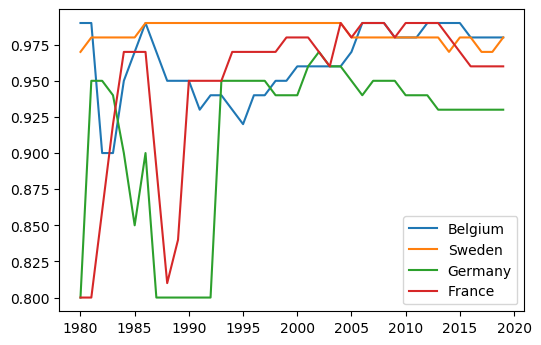

In [5]:
Countries = ['Belgium', 'Sweden', 'Germany', 'France']

for country in Countries:
    subset = polio_vac_long[polio_vac_long['country'] == country]
    plt.plot(subset['year'], subset['percentage'], label=country)
    
plt.legend();

## Something about color maps

https://matplotlib.org/stable/gallery/color/colormap_reference.html

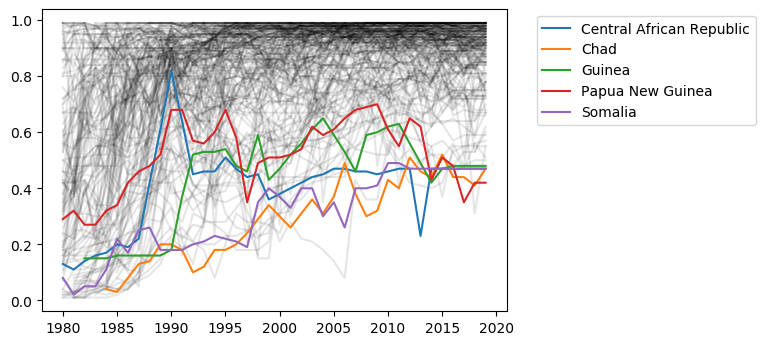

In [5]:

Countries = polio_vac['country']


    
for country in Countries:
    subset = polio_vac_long[polio_vac_long['country'] == country]
    last_percentage = subset.loc[ subset['year'] == subset['year'].max(), 'percentage' ].values[0]
    #print(last_percentage)
    if last_percentage >= 0.5:
        plt.plot(subset['year'], subset['percentage'], color = 'black', alpha = 0.1, zorder = 0)
    else:
        plt.plot(subset['year'], subset['percentage'],  label = country, zorder = 1)
        
    
    
plt.legend(bbox_to_anchor=(1.05, 1));        

## [only for the interested]

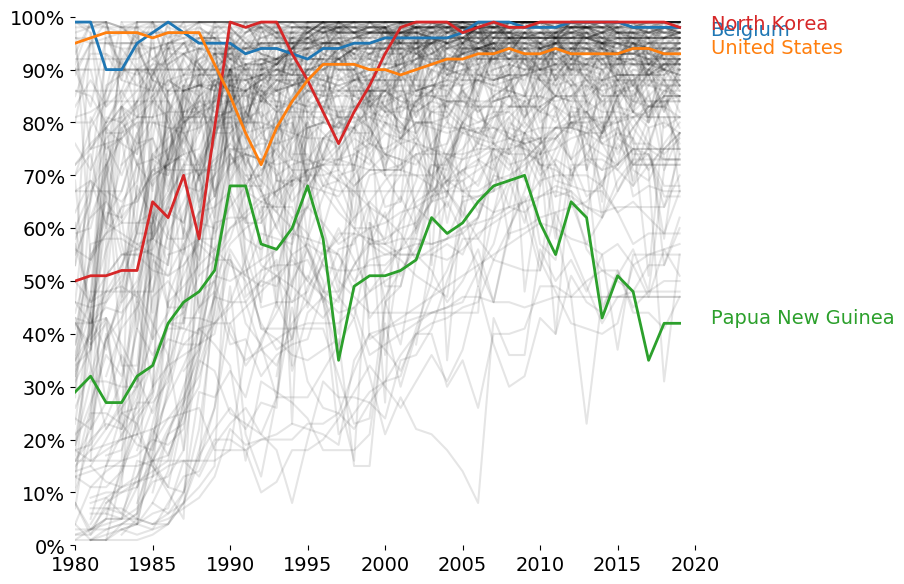

In [13]:
import matplotlib.cm as cm

Highlight = ['Belgium', 'United States', 'Papua New Guinea', 'North Korea']

Countries = polio_vac['country']

plt.figure(figsize=(8, 7))
plt.box(False)
plt.ylim(0, 1)    
plt.xlim(1980, 2020)  

plt.yticks(np.arange(0, 1.1, 0.1), [str(x) + "%" for x in range(0, 110, 10)], fontsize=14)    
plt.xticks(fontsize=14) 
    
    
for country in Countries:
    subset = polio_vac_long[polio_vac_long['country'] == country]
    last_percentage = subset.loc[ subset['year'] == subset['year'].max(), 'percentage' ].values[0]
    
    if country in Highlight:
        kleur_getal = Highlight.index(country)
        plt.plot(subset['year'], subset['percentage'],  color = cm.tab10(kleur_getal), zorder = 1, linewidth=2)
        
        if last_percentage > 0.95:
            y_pos = last_percentage+np.random.uniform(-0.02,0.02) # Add some randomness to avoid overlapping labels for high percentage countries
        else:    
            y_pos = last_percentage
        plt.text(2021, y_pos, country, fontsize=14, color = cm.tab10(kleur_getal))
    else:
        plt.plot(subset['year'], subset['percentage'], color = 'black', alpha = 0.1, zorder = 0);
    
    

In [52]:
np.arange(10, 20, 2)

array([10, 12, 14, 16, 18])

In [ ]:
plt.yticks(np.arange(10, 20, 2), [str(x) + "%" for x in np.arange(10, 20, 2)], fontsize=14) 

## Excercise: Play around!

Use the data sources available at [Gapminder](https://www.gapminder.org/data/) and visualise things that interest you. Try to work in the followng way:

1. look at the data sources and find one that interest you
2. formulate the question you will solve
3. make the most basic visualisation that has the required elements
4. tune your visual to tell the story

5. [optional] put it in a jupyter notebook (+data & library loading) and send it to me in a zip file (with the data also in the file). I will send your notebook back with some comments/feedback.

In [15]:
fertility = pd.read_csv('children_per_woman_total_fertility.csv')
fertility.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82


In [16]:
fertility_long = pd.melt(fertility, id_vars='country', var_name='year', value_name='childeren_per_woman')

fertility_long['year'] = fertility_long['year'].astype(int)

fertility_long.head()

,country,year,childeren_per_woman
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00


In [33]:
fertility_long[fertility_long['country'] == 'Afghanistan']

,country,year,childeren_per_woman
0,Afghanistan,1800,7.00
184,Afghanistan,1801,7.00
368,Afghanistan,1802,7.00
552,Afghanistan,1803,7.00
736,Afghanistan,1804,7.00
...,...,...,...
54464,Afghanistan,2096,1.74
54648,Afghanistan,2097,1.74
54832,Afghanistan,2098,1.74
55016,Afghanistan,2099,1.74


In [20]:
fertility_long['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Hond

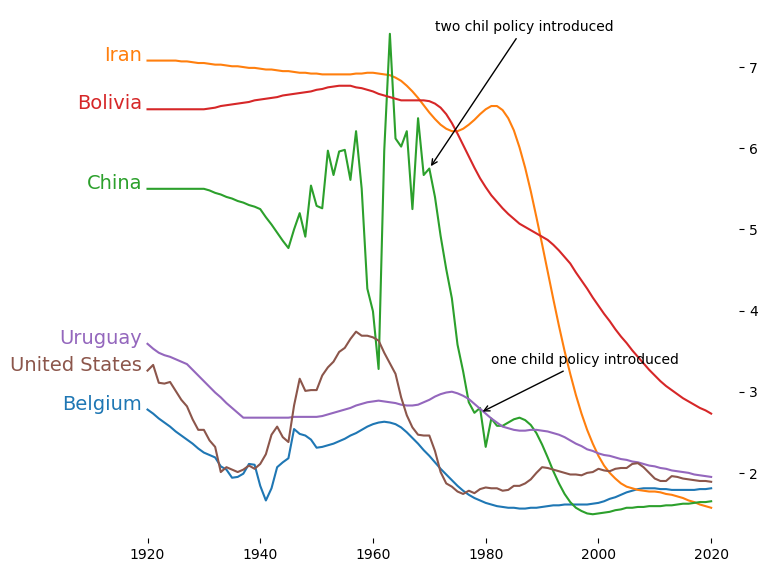

In [49]:
import matplotlib.cm as cm

Countries = ['Belgium', 'Iran', 'China', 'Bolivia', 'Uruguay', 'United States']

plt.figure(figsize=(8, 7))
plt.box(False)
#plt.ylim(0, 1)    
#plt.xlim(1920, 2020)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True, left=False, right=True) 

for country in Countries:
    subset = fertility_long[fertility_long['country'] == country]
    subset = subset[(subset['year'] >= 1920) & (subset['year'] <= 2020) ]
    
    land_index = Countries.index(country) # voor de kleur
    
    plt.plot(subset['year'], subset['childeren_per_woman'], color = cm.tab10(land_index))
    y_pos = subset[subset['year'] == 1920]['childeren_per_woman']
    plt.text(1919, y_pos, country, fontsize=14, color = cm.tab10(land_index), ha = 'right')
    
    if country == 'China':
        plt.annotate("one child policy introduced",
            xy=(1979, subset[subset['year'] == 1978]['childeren_per_woman']), xycoords='data',
            xytext=(1979+2, subset[subset['year'] == 1978]['childeren_per_woman'] + 0.6), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
        
        plt.annotate("two chil policy introduced",
            xy=(1970, subset[subset['year'] == 1970]['childeren_per_woman']), xycoords='data',
            xytext=(1970+1, subset[subset['year'] == 1970]['childeren_per_woman'] + 1.7), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
    
   
#plt.legend();